# Prédiction de l'octroi ou non (loan_status) des prêts de la banque à des individus :
 Ce projet consite à prédire l'attribution des prêts (ou non) à des individus en tenant compte de plusieurs caractéristiques (revenus, historique de credit positif ou négatif, etc..) en utilisant le modèle de Machine Learning qu'est le K- Nearest Neighbors (KNN).
 Pour cet algorithme, basé sur les distances, seront tester deux mesures de distances : **Manhattan** et **Euclidienne**.
 - **Hypothèses du modèle KNN** :
  1. **Proximité = similarité**
    - Hypothèse principale : deux observations proches dans l'espace des variables ont probablement la même classe.

  2. **Distance pertinente**
    - La distance choisie (souvent euclidienne) doit avoir du sens :
      - Les variables doivent être normalisées si elles sont sur des échelles différentes.
      - Il faut éviter de mélanger des natures de données trop différentes.

  3. **Densité locale suffisante**
    - Il doit y avoir suffisamment d’exemples autour d’un point pour permettre une bonne classification.

  4. **Variables informatives**
    - Les variables utilisées doivent être discriminantes. Trop de bruit ou de dimensions inutiles nuisent à la performance.

  5. **Classes équilibrées**
    - k-NN est sensible aux déséquilibres de classes. Un fort déséquilibre peut biaiser la prédiction vers la classe majoritaire.

# Sommaire :

1. Nettoyage des données
2. Description de la base des données
3. Analyse univariée et gestion des valeurs manquantes
4. Analyse bivariée
5. Enrehistrement des données pour la modélisation




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importation des données

In [ ]:
data = pd.read_csv("../bank_loan.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Description du data set** :
- Loan_ID : Identifiant unique du prêt
- Gender : Sexe de l'emprunteur
- Married : Statut marital de l'emprunteur
- Dependents : Nombre de personnes à charge (enfants, ou membres de famille)
- Education : Niveau d'étude (Graduate ou Non-graduate)
- Self_Employed : Statut de travailleur indépendant (oui ou non)
- ApplicantIncome : Revenu mensuel de l'emprunteur principal
- CoapplicantIncome : Revenu mensuel du co-emprunteur (partagent la responsabilité du remboursement)
- LoanAmount : montant du prêt demandé (en milliers)
- Loan_Amount_Term : Durée du prêt (en nombre de mois)
- Credit_History : Historique de crédit (1 = bon, 0 = mauvais antécédent, NaN = inconnu)
- Property_Area : Zone de la propriété (Urbain / Semi-Urbain / Rural)
- Loan_Status : Statut d'approbation du prêt (Y = approuvé, N = refusé)

In [ ]:
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# Suppression de l'identifiant du prêt qui n'est pas pertinent
data.drop("Loan_ID", axis = 1, inplace = True)

In [ ]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# Renommage des étiquettes des colonnes
data.columns = ["sex", "married", "dependents", "education", "self_employed", "income", "co_income", "amount", "duration", "history", "area", "loan_status"]


In [ ]:
data.head(3)

,sex,married,dependents,education,self_employed,income,co_income,amount,duration,history,area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## Analyse univariariée, gestions des valeurs manquantes et outliers

In [ ]:
# 1. variable cible (loan_status)
print("nombre des valeurs manquantes: ", int(data["loan_status"].isna().sum()))

nombre des valeurs manquantes:  0


In [ ]:
# les modalités de la variables
data["loan_status"].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='loan_status', ylabel='count'>

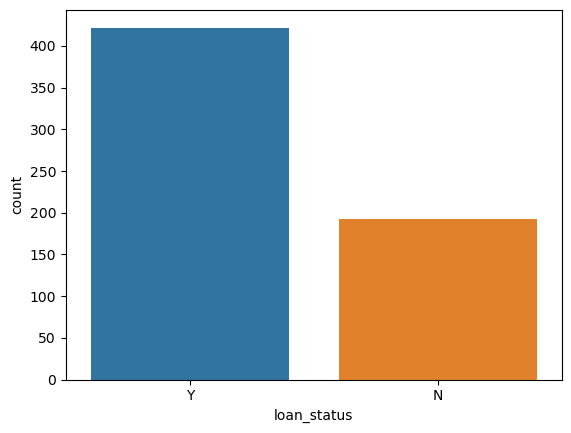

In [ ]:
# distribution
sns.countplot(x = "loan_status", data = data, hue = "loan_status")

In [ ]:
# proportion (fréquance relative) de chaque modalité
data["loan_status"].value_counts(normalize = True)

loan_status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

**Remarque** : il y'a un déséquilibre de classe que l'on traitera avec la méthode d'**OverSampling** de la classe minoritaire avant l'entrainement du modèle

In [ ]:
# 2. Les variables explicatives qualitatives (catégorielles)
cat_var = data[["sex", "married", "dependents", "education", "self_employed", "history", "area"]]
cat_var = cat_var.copy()
cat_var.head(3)

,sex,married,dependents,education,self_employed,history,area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban


In [ ]:
# les valeurs manquantes
missing_values = cat_var.isna().sum()
missing_values

sex              13
married           3
dependents       15
education         0
self_employed    32
history          50
area              0
dtype: int64

In [ ]:
# imputation par le mode (modalité de fréquence absolue la plus elevée)
for var in cat_var.columns:
  if missing_values[var] > 0:
    cat_var[var].fillna(cat_var[var].mode()[0], inplace = True)

C:\Users\tambw\AppData\Local\Temp\ipykernel_11596\814457286.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_var[var].fillna(cat_var[var].mode()[0], inplace = True)


In [ ]:
cat_var.isna().sum()

sex              0
married          0
dependents       0
education        0
self_employed    0
history          0
area             0
dtype: int64

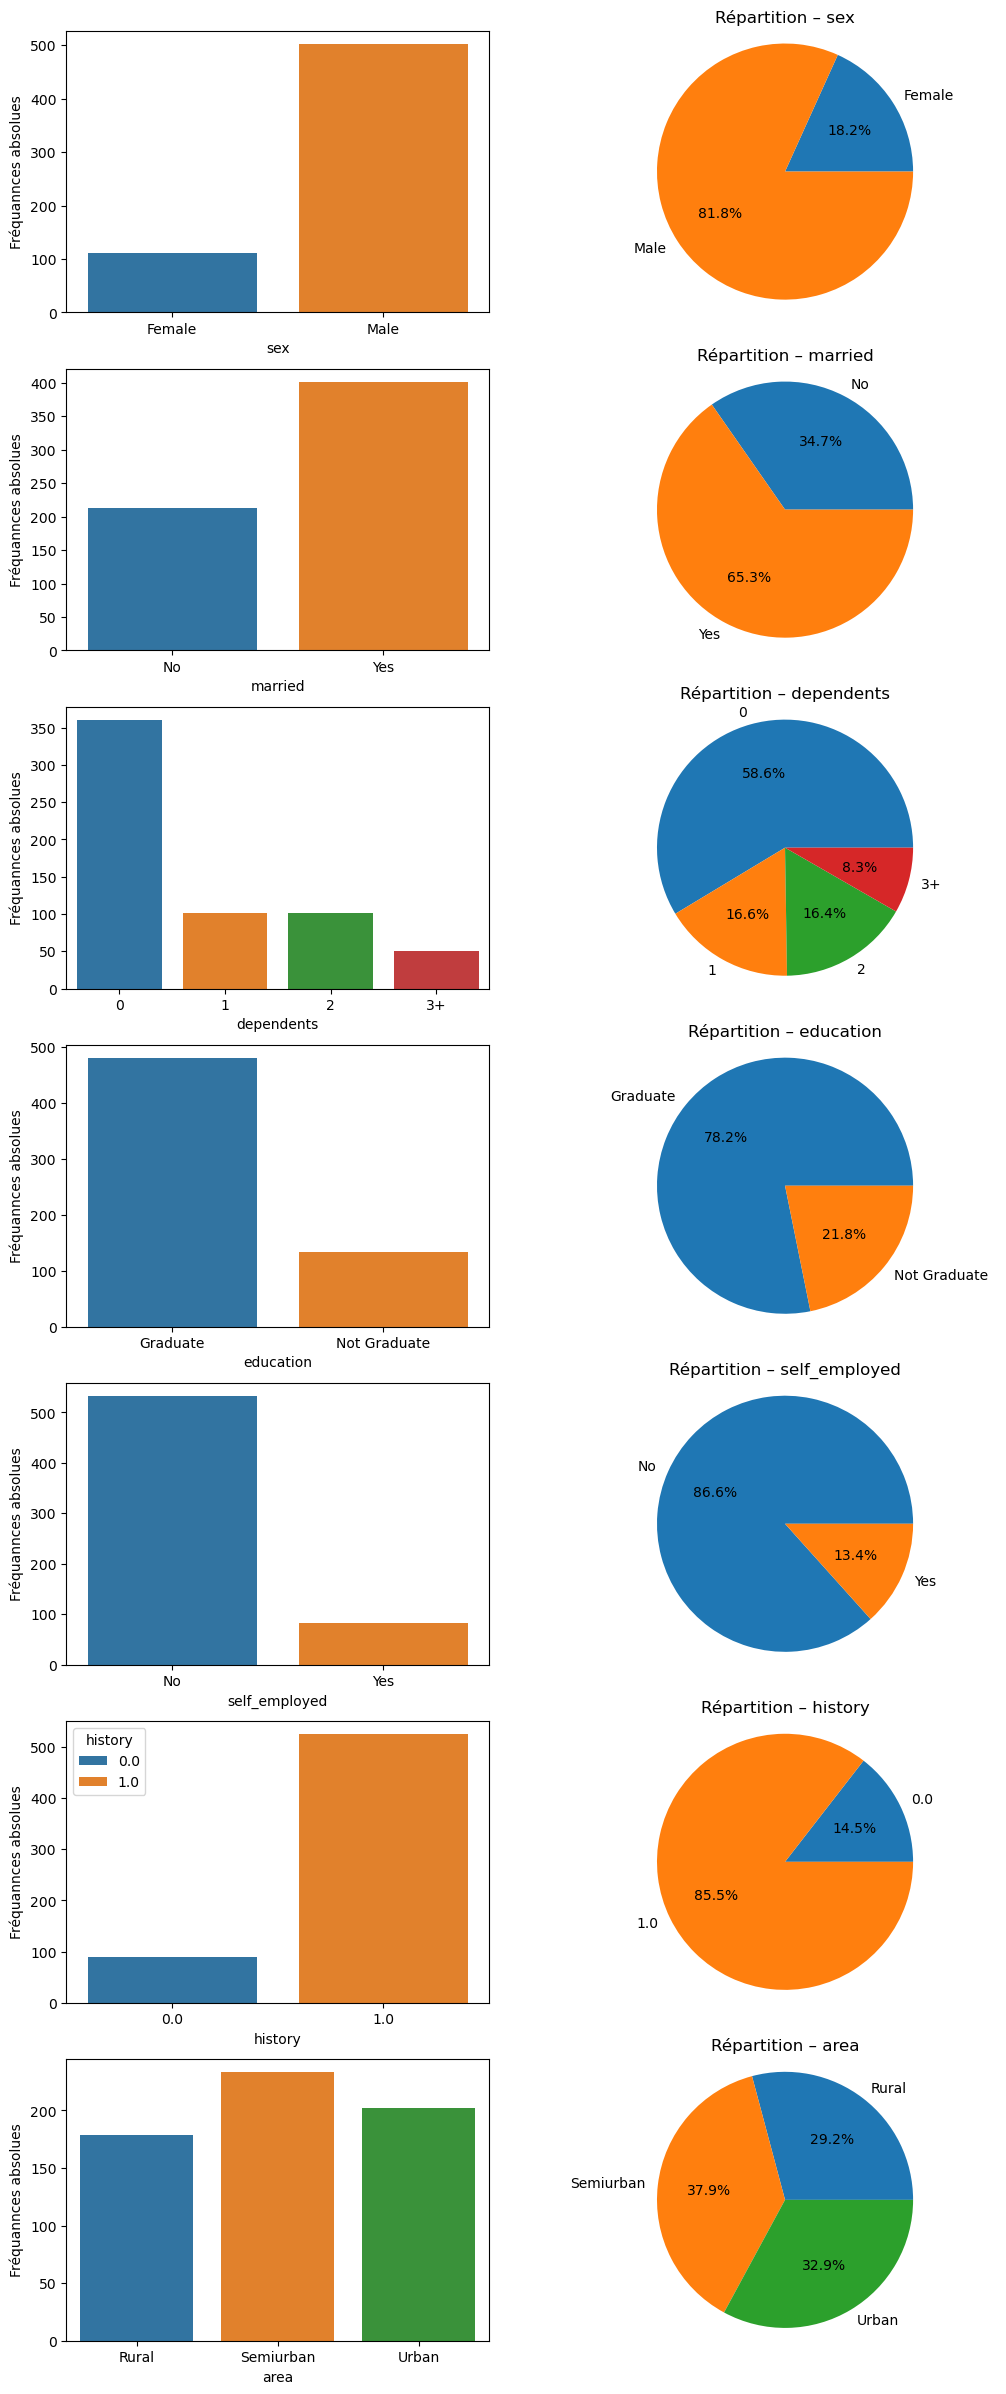

In [ ]:
# visalisation graphique
fig, axes = plt.subplots(cat_var.shape[1], 2, figsize = (12, 30))
for i in range(cat_var.shape[1]):
  for j in range(2):
    if j == 0:
      sns.countplot(x = cat_var.columns[i], data = cat_var.sort_values(ascending = True, by = cat_var.columns[i]), hue = cat_var.columns[i], ax = axes[i, j])
      axes[i, j].set_xlabel(cat_var.columns[i])
      axes[i, j].set_ylabel("Fréquannces absolues")
    else :
      # Extraire les effectifs des modalités de la variable
      value_counts = cat_var[cat_var.columns[i]].value_counts(dropna=False).sort_index()

      # Préparer les labels et les fréquences
      labels = value_counts.index.astype(str)
      frequences = value_counts.values.astype(float)

      # Afficher le camembert
      axes[i, j].pie(frequences, labels=labels, autopct='%1.1f%%')
      axes[i, j].axis('equal')  # Cercle parfait
      axes[i, j].set_title(f"Répartition – {cat_var.columns[i]}")

La variable **area** présente un déséquilibre de classes relativement faible, contrairement aux autres classes où ce déséquilibre est assez prononcé.

In [ ]:
# 3. les variables explicatives quantitatives (numériques)
num_var = data[["income", "co_income", "amount", "duration"]]
num_var = num_var.copy()
num_var.head(3)

,income,co_income,amount,duration
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0


In [ ]:
# les valeurs manquantes
num_var.isna().sum()

income        0
co_income     0
amount       22
duration     14
dtype: int64

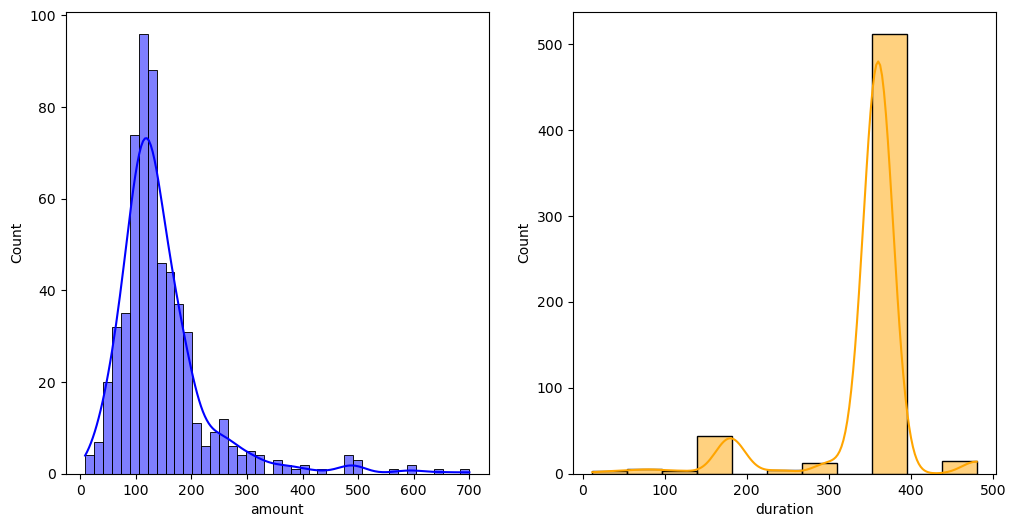

In [ ]:
# visualisation de la distribution de amount et duration
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(num_var['amount'], kde = True, color = "blue", ax = axes[0])
sns.histplot(num_var['duration'], kde = True, color = "orange", ax = axes[1])
plt.show()

Les distributions semblent asymétrique et ne semblent pas suivre des lois  normales. Confirmons cela par des tests statistiques puis en cas de normalité et de symétrie, les valeurs manquantes seront imputées par **la moyenne** et sinon, par **la médiane**.

In [ ]:
from scipy.stats import skew, shapiro, kstest, zscore

In [ ]:
def normarl_skew_test(data, var_names):
  variables = data.dropna()
  result = {
      "skewness": [],
      "shapiro_p_value": [],
      "ks_p_value" : []
  }
  for var in var_names :
    skewness = skew(variables[var])
    _, p_shapiro = shapiro(variables[var])
    _, p_ks = kstest(zscore(variables[var]), "norm")
    result["skewness"].append(skewness)
    result["shapiro_p_value"].append(p_shapiro)
    result["ks_p_value"].append(p_ks)

  df = pd.DataFrame(result, index = var_names)
  return df

In [ ]:
normarl_skew_test(num_var, ["amount", "duration"])

,skewness,shapiro_p_value,ks_p_value
amount,2.642696,1.111608e-27,1.254565e-14
duration,-2.358690,6.424999e-38,1.516475e-126


les coéfficients d'asymétries de deux distributions sont fortement asymétrique (valeur en valeur absolue loin de **0**), et les p-valeurs des tests de normalité (Shapiro-Wilk et Kolmogorov-Smirnov) sont inférieur au seuil **5%**. De ce fait on fera une imputation par la médiane.

In [ ]:
num_var.fillna(value = {"amount" : num_var["amount"].median(), "duration" : num_var["duration"].median()},inplace = True)

In [ ]:
num_var.isna().sum()

income       0
co_income    0
amount       0
duration     0
dtype: int64

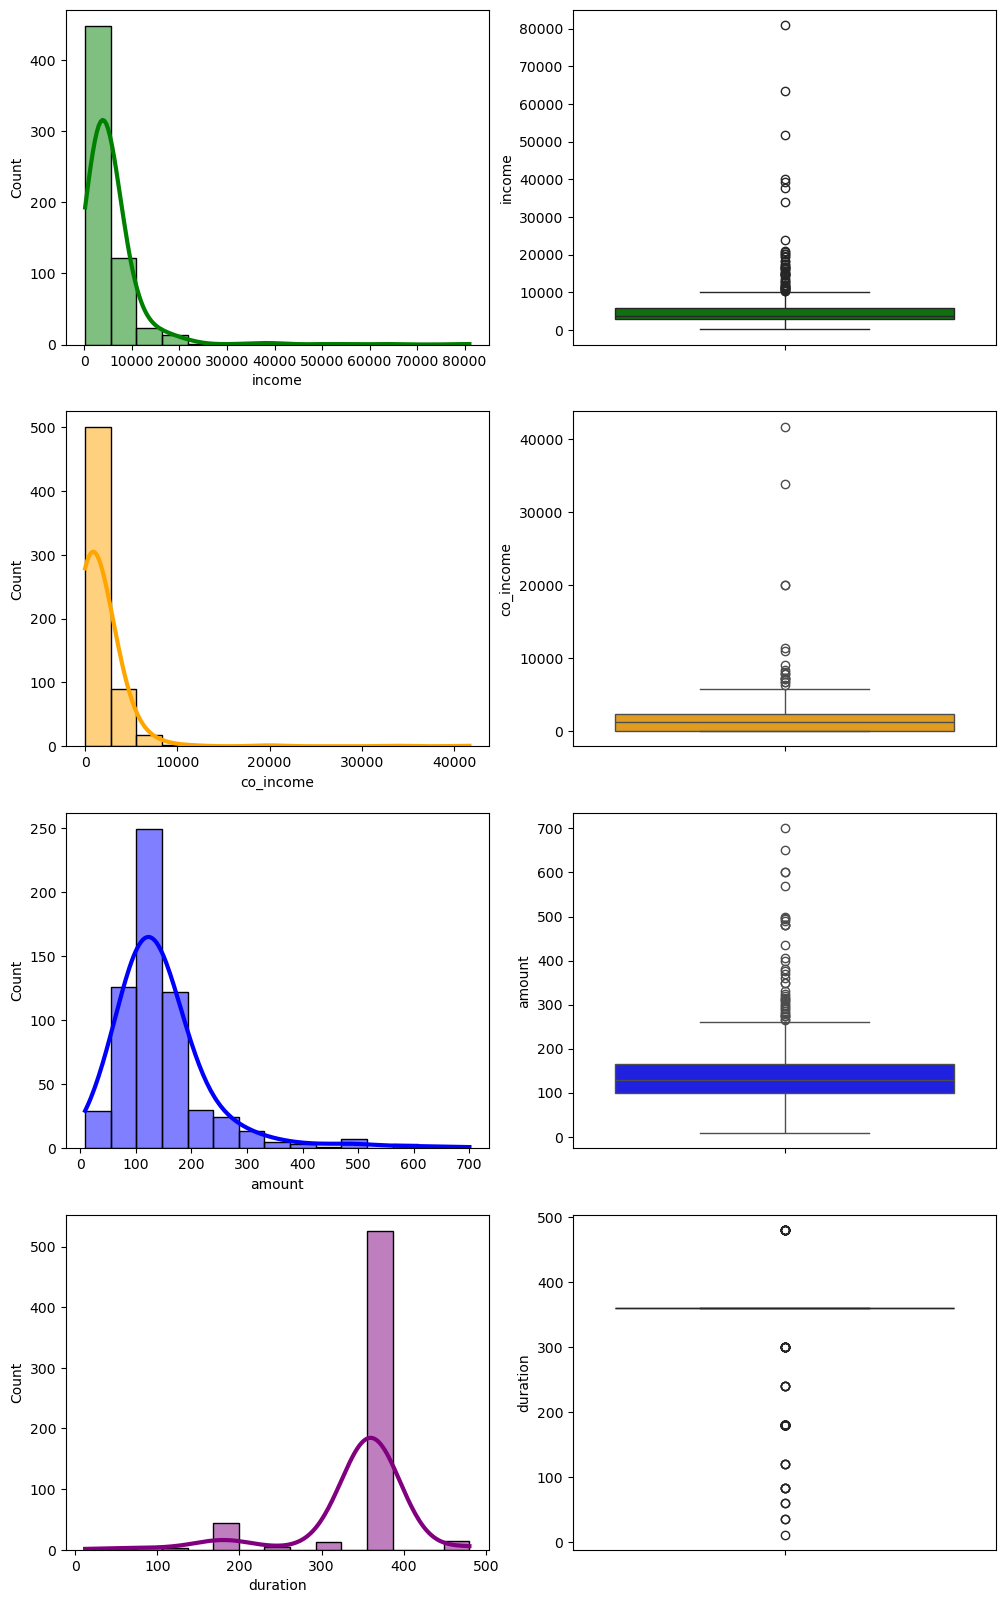

In [ ]:
# visualtion des variables numériques
colors = ["green", "orange", "blue", "purple"]
fig, axes =plt.subplots(num_var.shape[1], 2, figsize = (12, 20))
for i in range(num_var.shape[1]):
  for j in range(2):
    if j == 0:
      sns.histplot(num_var[num_var.columns[i]], kde = True, ax = axes[i, j], color = colors[i], bins = 15, kde_kws={'bw_adjust': 2}, line_kws={"linewidth": 3})
      axes[i, j].set_xlabel(num_var.columns[i])
    else :
      sns.boxplot(y = num_var[num_var.columns[i]], ax = axes[i, j], color = colors[i])
      axes[i, j].set_ylabel(num_var.columns[i])
plt.show()

In [ ]:
# tests d'asymétrie et de normalité
normarl_skew_test(num_var, num_var.columns)

,skewness,shapiro_p_value,ks_p_value
income,6.523526,4.812592e-39,2.645146e-34
co_income,7.473217,8.946465e-39,4.201610e-46
amount,2.736347,6.368865e-29,2.263411e-16
duration,-2.396240,4.773738e-39,9.792808e-136


Toutes les variables explicatives quantitatives sont **fortement asymétriqur**,et on utilisera une transformation **logarithmique** pour réduire l'influance des valeurs aberrantes.

In [ ]:
# vérifions que les variables sont toutes positives
num_var.describe().min()

income       150.0
co_income      0.0
amount         9.0
duration      12.0
dtype: float64

In [ ]:
# transformation log(x + 1)
num_var_transformed = np.log1p(num_var)
num_var_transformed = num_var_transformed.copy()

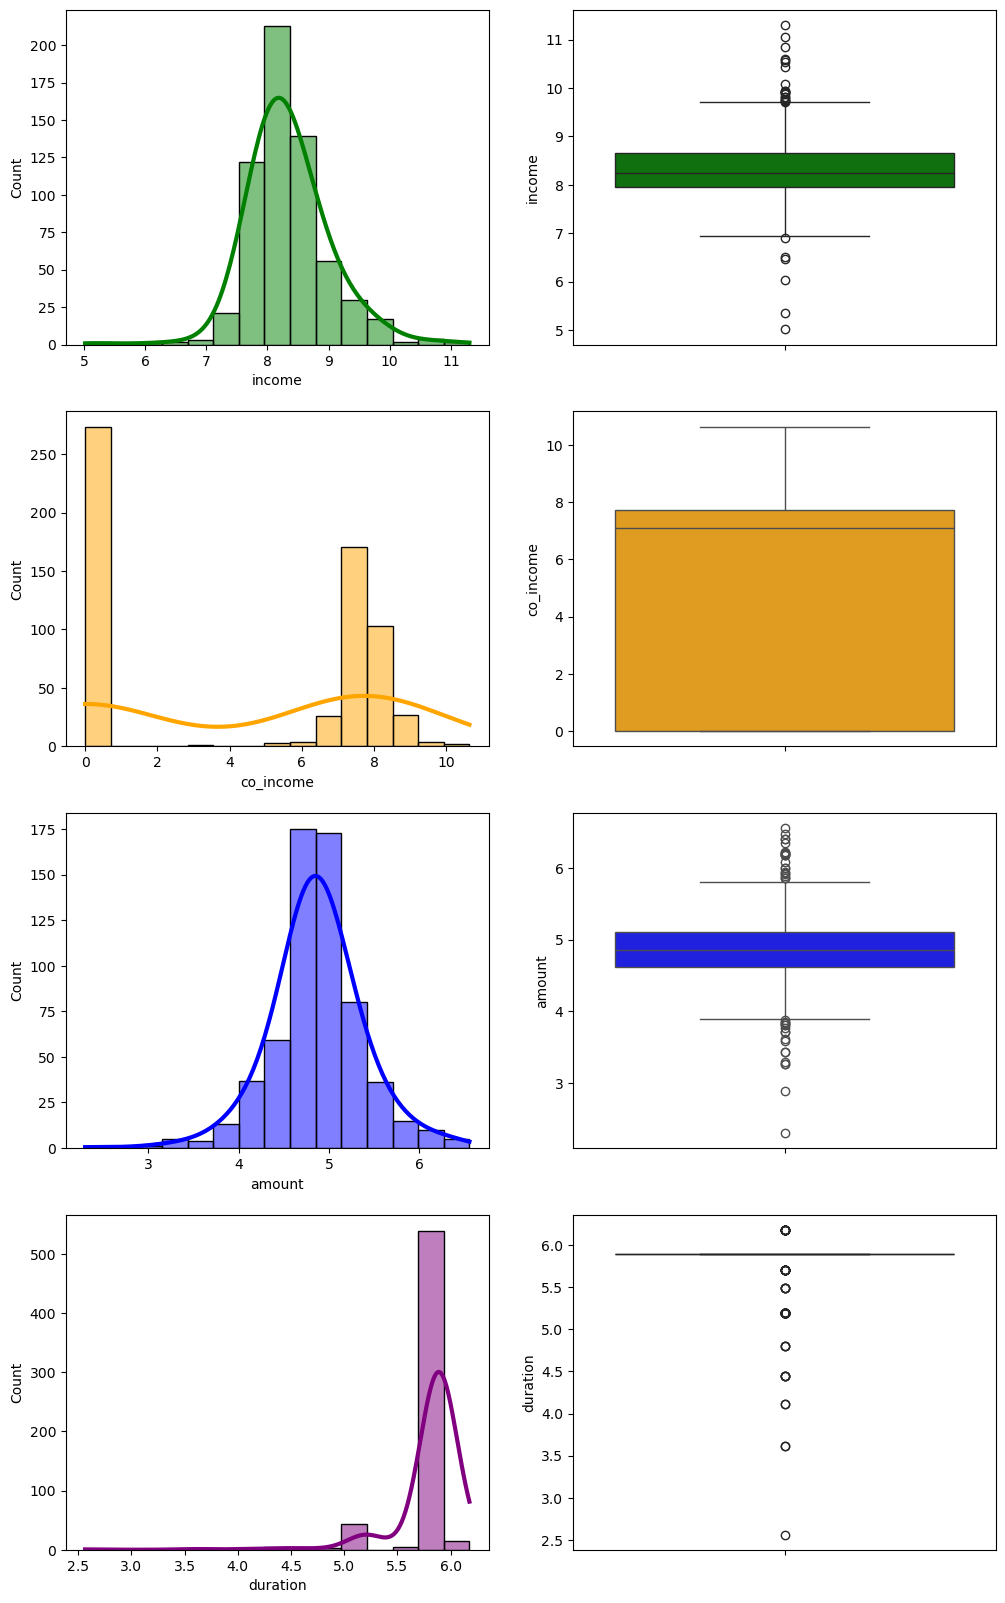

In [ ]:
# visualisation des variables transformées
colors = ["green", "orange", "blue", "purple"]
fig, axes =plt.subplots(num_var_transformed.shape[1], 2, figsize = (12, 20))
for i in range(num_var_transformed.shape[1]):
  for j in range(2):
    if j == 0:
      sns.histplot(num_var_transformed[num_var_transformed.columns[i]], kde = True, ax = axes[i, j], color = colors[i], bins = 15, kde_kws={'bw_adjust': 2}, line_kws={"linewidth": 3})
      axes[i, j].set_xlabel(num_var_transformed.columns[i])
    else :
      sns.boxplot(y = num_var_transformed[num_var_transformed.columns[i]], ax = axes[i, j], color = colors[i])
      axes[i, j].set_ylabel(num_var_transformed.columns[i])
plt.show()

In [ ]:
# tests d'asymétrie et de normalité
normarl_skew_test(num_var_transformed, num_var_transformed.columns)

,skewness,shapiro_p_value,ks_p_value
income,0.480949,1.138066e-15,3.531011e-04
co_income,-0.172650,3.994395e-31,3.959482e-53
amount,-0.151207,5.479755e-12,1.264489e-04
duration,-4.789789,2.556316e-41,4.275880e-134


In [ ]:
num_var["duration"].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

On constate que **duration** ne prend qu'un nombre discret de valeur, on va donc la changer en **variable catégorielle ordinale** en convertissant les **mois** en **années**.

In [ ]:
# Remplacement des durées par leur équivalent en années entières

cat_var["duration"] = num_var["duration"].replace({
    12.0: 1,
    36.0: 3,
    60.0: 5,
    84.0: 7,
    120.0: 10,
    180.0: 15,
    240.0: 20,
    300.0: 25,
    360.0: 30,
    480.0: 40
})

In [ ]:
# Conversion en catégorie ordonnée
from pandas.api.types import CategoricalDtype

ordre_duree = CategoricalDtype(
    categories=[1, 3, 5, 7, 10, 15, 20, 25, 30, 40],
    ordered=True
)

cat_var["duration"] = cat_var["duration"].astype(ordre_duree)

In [ ]:
cat_var.head(3)

,sex,married,dependents,education,self_employed,history,area,duration
0,Male,No,0,Graduate,No,1.0,Urban,30
1,Male,Yes,1,Graduate,No,1.0,Rural,30
2,Male,Yes,0,Graduate,Yes,1.0,Urban,30


In [ ]:
cat_var['duration'].describe(include = ["category"])

count     614
unique     10
top        30
freq      526
Name: duration, dtype: int64

In [ ]:
# suppression de la variable "duration" dans les dataframes des variables numériques et numériques transformées
num_var.drop("duration", axis = 1, inplace = True)
num_var_transformed.drop("duration", axis = 1, inplace = True)

In [ ]:
num_var.head(3)

,income,co_income,amount
0,5849,0.0,128.0
1,4583,1508.0,128.0
2,3000,0.0,66.0


In [ ]:
num_var_transformed.head(3)

,income,co_income,amount
0,8.674197,0.000000,4.859812
1,8.430327,7.319202,4.859812
2,8.006701,0.000000,4.204693


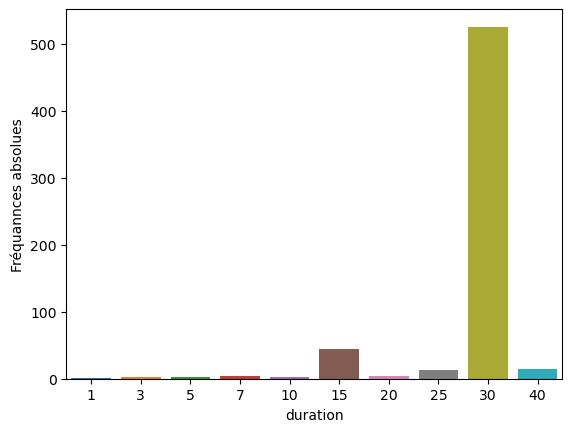

In [ ]:
# visualisation de la variable catégorielle duration
sns.countplot(x = "duration", data = cat_var, hue = "duration", legend = False)
plt.xlabel("duration")
plt.ylabel("Fréquannces absolues")
plt.show()

In [ ]:
cat_var["duration"].value_counts(normalize = True)

duration
30    0.856678
15    0.071661
40    0.024430
25    0.021173
7     0.006515
20    0.006515
10    0.004886
3     0.003257
5     0.003257
1     0.001629
Name: proportion, dtype: float64

## Analyse bivariée

### 1. Croisement des variables numériques et transformées avec la cibles

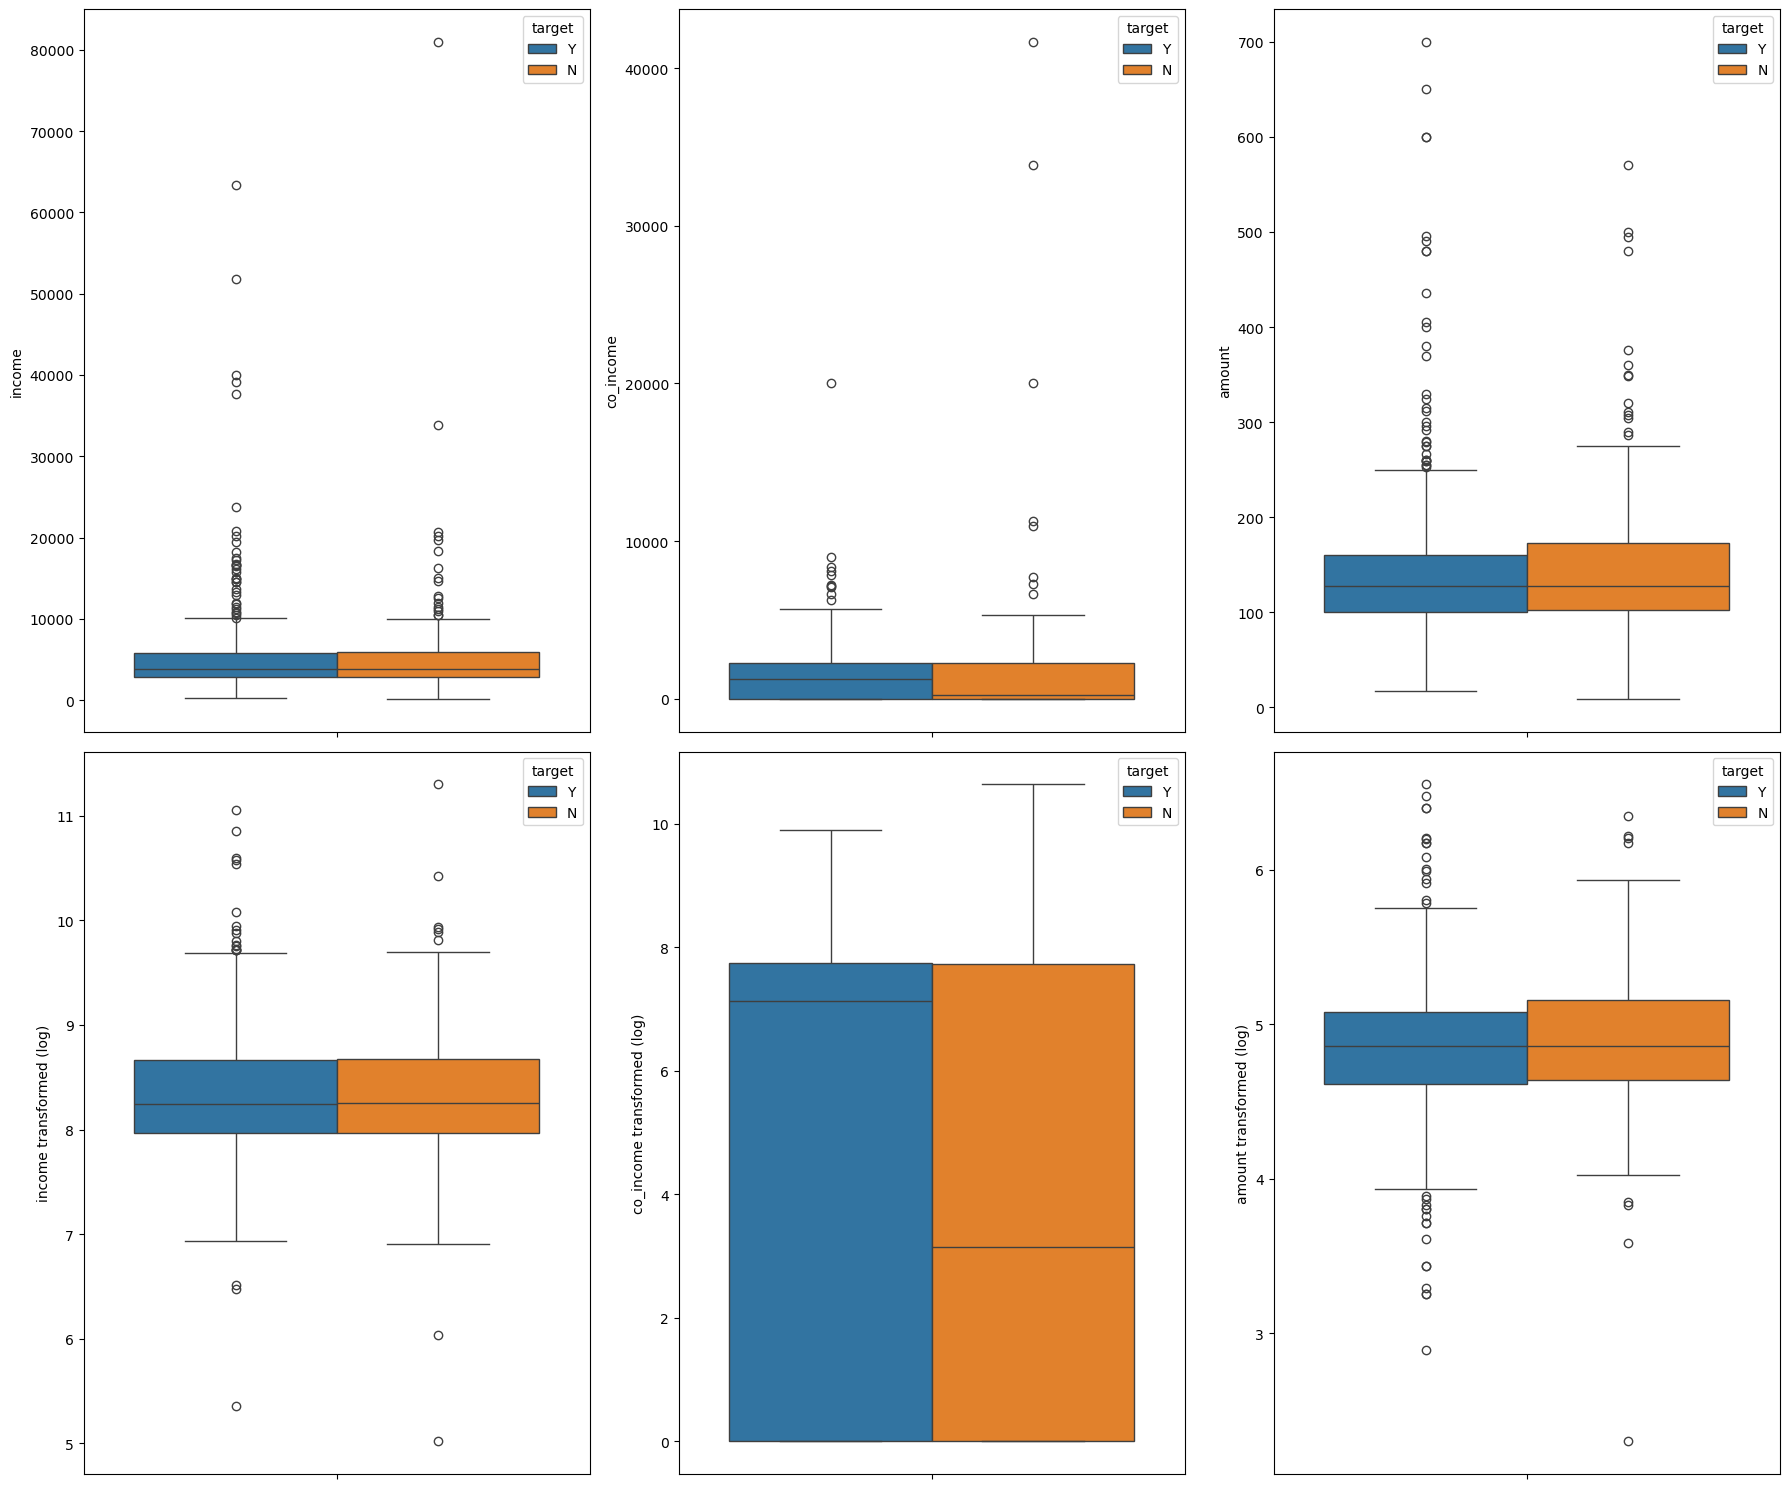

In [ ]:
num_var["target"] = data["loan_status"]
num_var_transformed["target"] = data["loan_status"]
fig, axes = plt.subplots(2, num_var.shape[1]- 1, figsize = (18, 15))
for i in range(num_var.shape[1] - 1):
  sns.boxplot(y = num_var.columns[i], data = num_var, hue = "target", ax = axes[0, i])
  axes[0, i].set_ylabel(num_var.columns[i])
  sns.boxplot(y = num_var_transformed.columns[i], data = num_var_transformed, hue = "target", ax = axes[1, i])
  axes[1, i].set_ylabel(num_var.columns[i] + " transformed (log)")

plt.tight_layout()
plt.show()

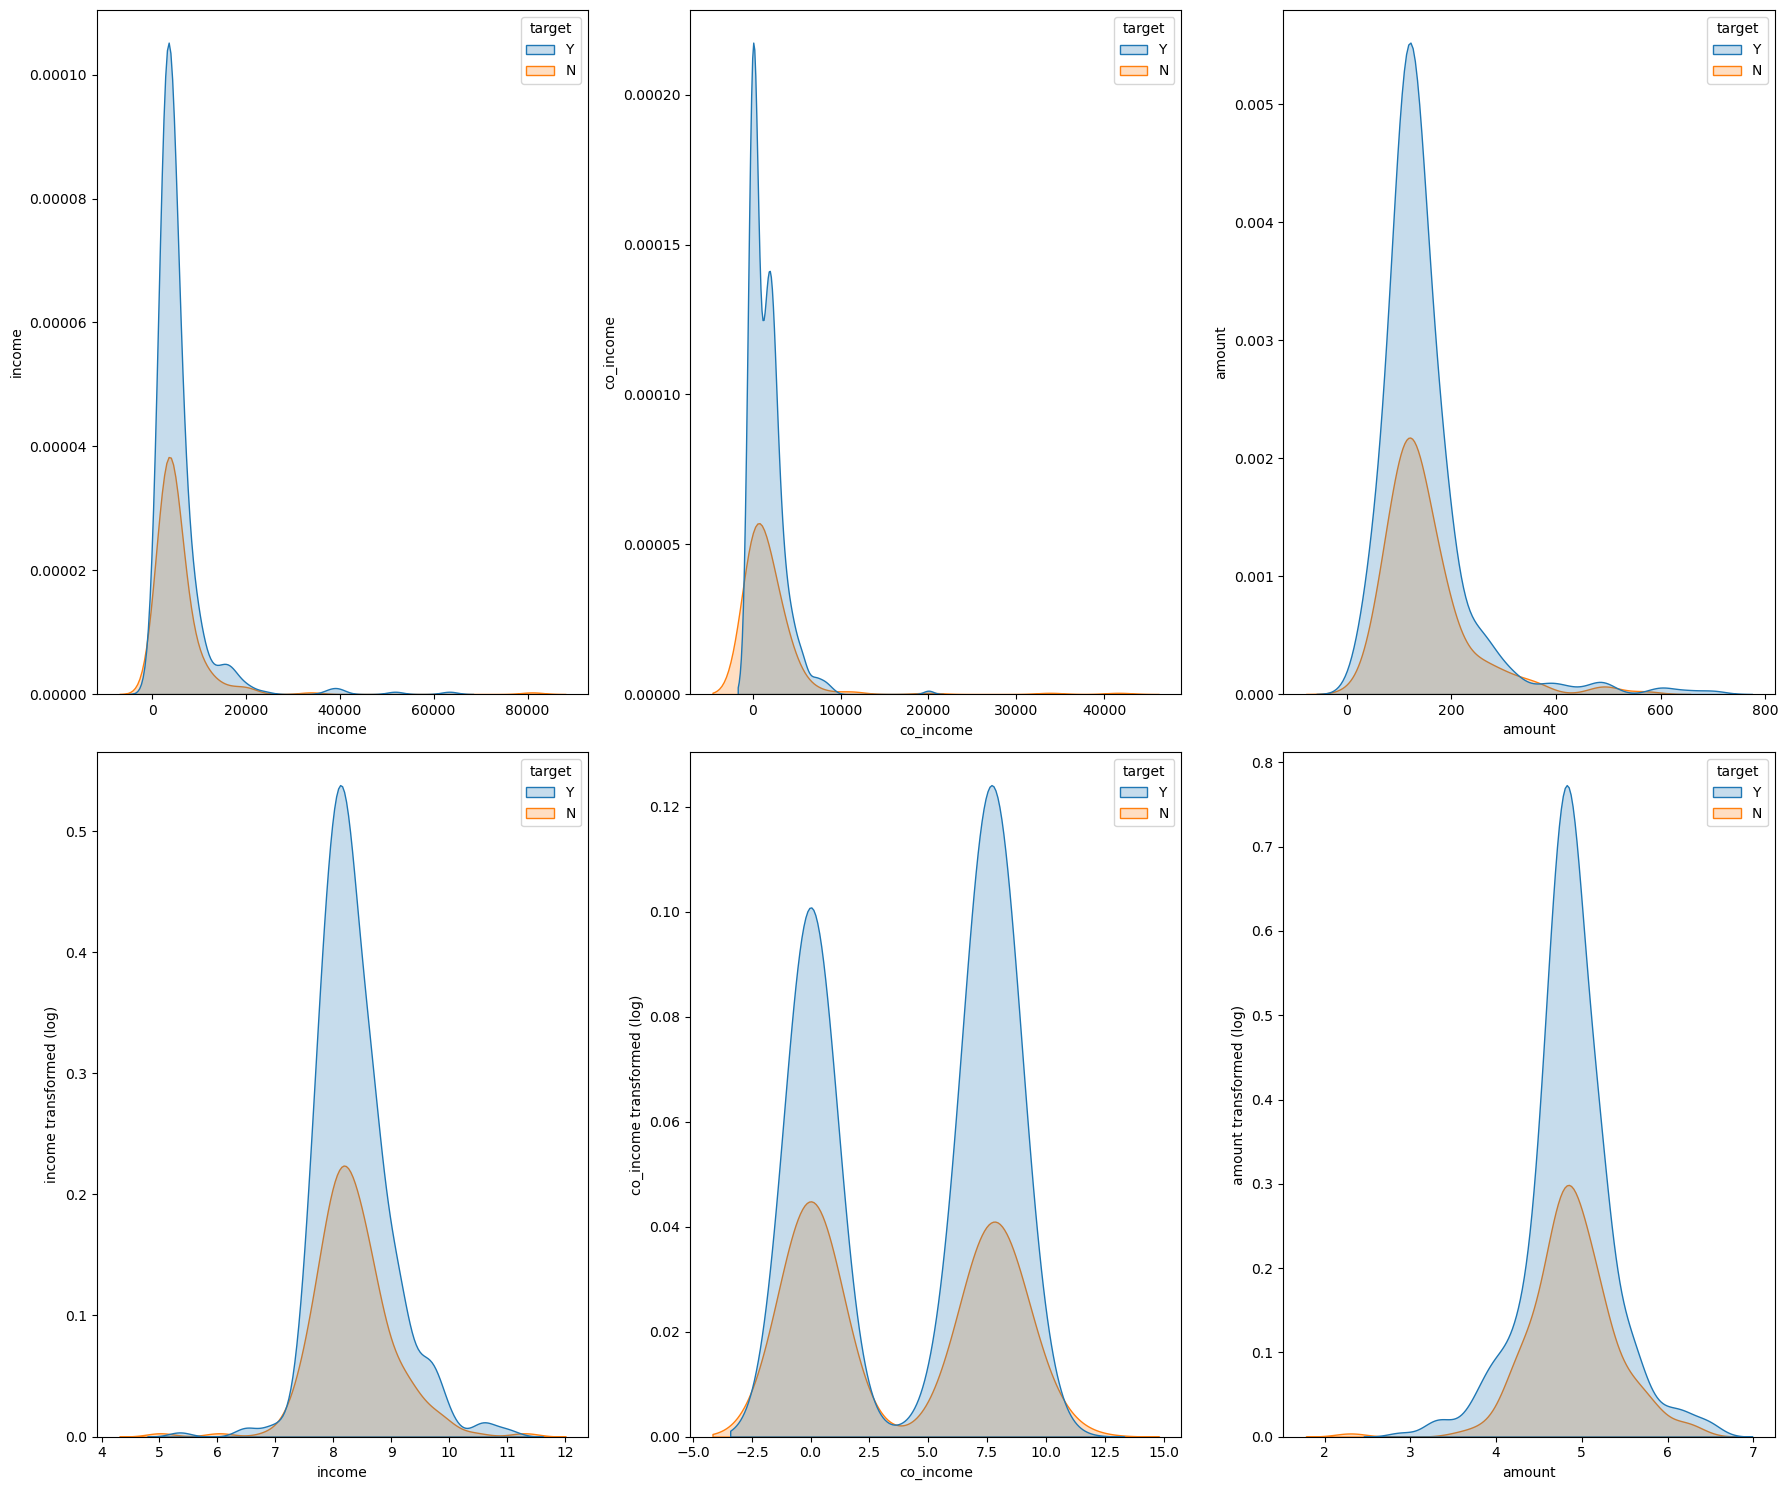

In [ ]:
fig, axes = plt.subplots(2, num_var.shape[1]- 1, figsize = (18, 15))
for i in range(num_var.shape[1] - 1):
  sns.kdeplot(x = num_var.columns[i], data = num_var, hue = "target", fill = True, ax = axes[0, i])
  axes[0, i].set_ylabel(num_var.columns[i])
  sns.kdeplot(x = num_var_transformed.columns[i], data = num_var_transformed, hue = "target", fill = True, ax = axes[1, i])
  axes[1, i].set_ylabel(num_var.columns[i] + " transformed (log)")

plt.tight_layout()
plt.show()

Visuellement les revenus de l'enprunteur principale(**incone**) et le montant de prêt demandé (**amount**) ne semblent pas trop influencer l'attribution du prêt (**loan_status**) du fait des **ditributions assez proches au sein de chaque claque calsse** de la variable cible qui est loan_status.
Nous allons vérifier cette liaison par des tests statistiques (ANOVA etKruskal - Wallis).

L'hypothèse de normalité de la distribution des variables explicatives quantitatives au sein de chaque classe (**0** ou **1**) de la variable cible n'étant pas vérifiée, il convient donc de réaliser le test non-paramétrique de **Kruskal-Wallis**.

In [ ]:
from scipy.stats import kruskal

In [ ]:
def test_kruskal(variables, categorie):
    resultat = {"stat": [], "p-value": [], "Association with target": []}
    var_names = variables.columns

    for var in var_names:
        # Création des groupes en fonction de la variable catégorielle
        groupes = [
            variables[categorie == cat][var].dropna()
            for cat in categorie.unique()
        ]

        # Test de Kruskal-Wallis
        stat, p = kruskal(*groupes)
        resultat["stat"].append(stat)
        resultat["p-value"].append(p)
        resultat["Association with target"].append(p < 0.05)

    return pd.DataFrame(resultat, index=var_names)

In [ ]:
num_var.drop("target", axis = 1, inplace = True)
num_var_transformed.drop("target", axis = 1, inplace = True)

In [ ]:
test_kruskal(num_var, data["loan_status"])

,stat,p-value,Association with target
income,0.010620,0.917920,False
co_income,0.749191,0.386733,False
amount,0.715969,0.397469,False


In [ ]:
test_kruskal(num_var_transformed, data["loan_status"])

,stat,p-value,Association with target
income,0.010620,0.917920,False
co_income,0.749191,0.386733,False
amount,0.715969,0.397469,False


Il semble qu'il n'existe pas de différence significative entre les distributions des variables numériques selon la modalité **Yes**(prêt accordé) et **No**(prêt refusé).

### 2. Croisement des variables catégorielles avec la variable cible

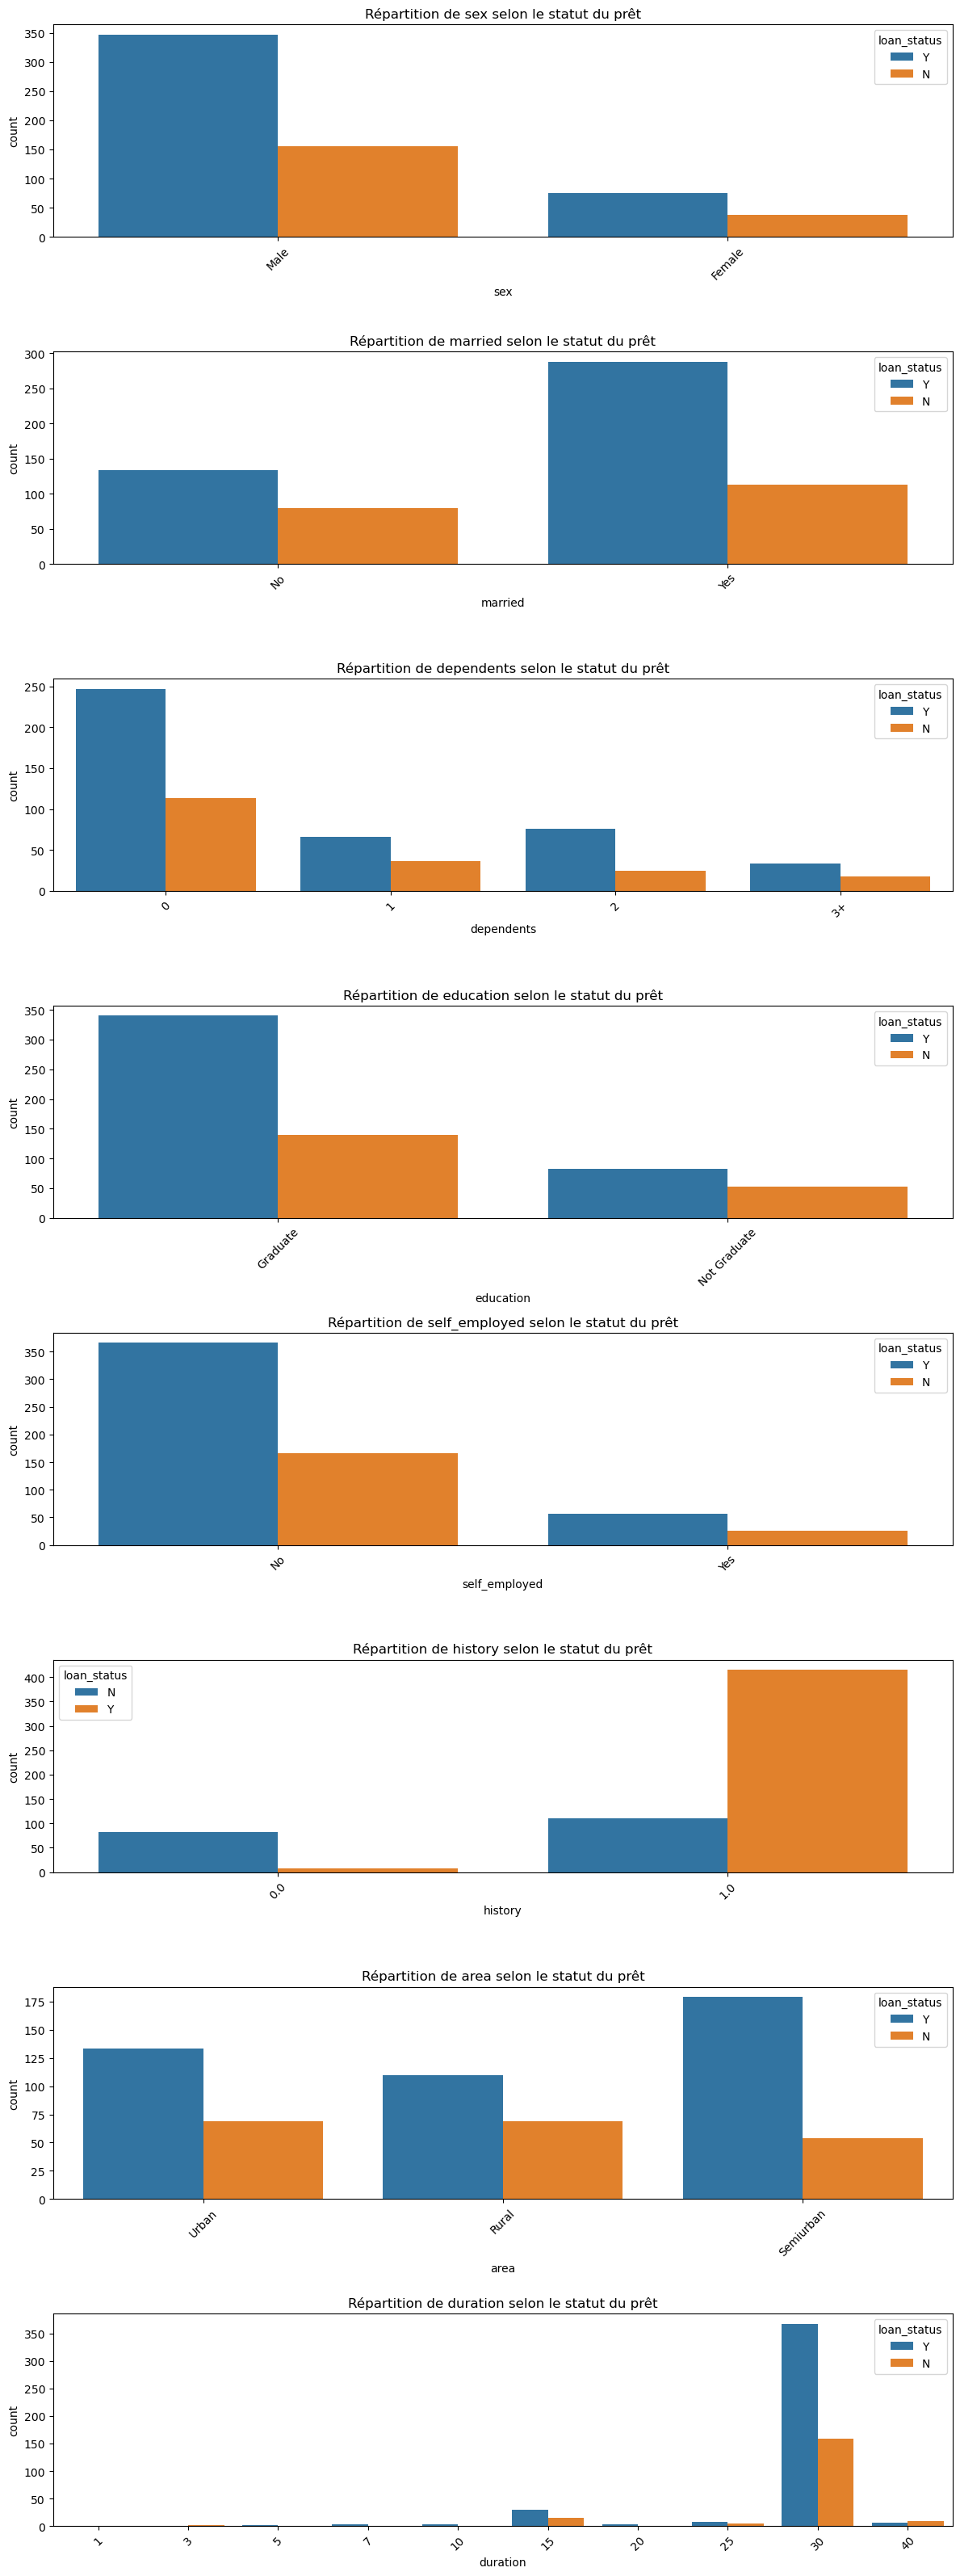

In [ ]:
fig, axes = plt.subplots(cat_var.shape[1], 1, figsize=(12, 4 * cat_var.shape[1]))  # Ajuste la hauteur par variable
for i, var in enumerate(cat_var.columns):
    sns.countplot(x=var, data=cat_var.join(data["loan_status"]), hue="loan_status", ax=axes[i])
    axes[i].set_title(f"Répartition de {var} selon le statut du prêt", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Exemple d'interprétation : pour le croisement de **history** (1 : bon historique des prêts et 0 : absence ou historique douteux), avec la variable cible, on constate que le nombre des personnes ayant reçu **un refus** est assez proche dans les personnes ayant un historique positif et ceux avec un historique  douteux, toutefois, **l'attribution du credit** est fortement **liée** au fait d'avoir un historique positif.

In [ ]:
import scipy.stats as stats

In [ ]:
def test_chi2(variables):
    result = {}
    for var1 in variables.columns:
        result[var1] = []
        for var2 in variables.columns:
          # Éviter de tester la variable avec elle-même
            if var1 != var2:
                table_contingence = pd.crosstab(variables[var1], variables[var2])
                _, p_value, _, _ = stats.chi2_contingency(table_contingence)
                result[var1].append(round(p_value, 2))  # Arrondi à 2 décimales
            else:
                result[var1].append(None)
    # Transformer en DataFrame
    corr_df = pd.DataFrame(result, index=variables.columns)
    # true si il y'a association (dépendance)
    corr_df = corr_df < 0.05
    return corr_df

In [ ]:
cat_var["target"] = data["loan_status"]

In [ ]:
test_chi2(cat_var)

,sex,married,dependents,education,self_employed,history,area,duration,target
sex,False,True,True,False,False,False,True,False,False
married,True,False,True,False,False,False,False,True,True
dependents,True,True,False,False,False,False,False,False,False
education,False,False,False,False,False,False,False,False,True
self_employed,False,False,False,False,False,False,False,False,False
history,False,False,False,False,False,False,False,False,True
area,True,False,False,False,False,False,False,False,True
duration,False,True,False,False,False,False,False,False,False
target,False,True,False,True,False,True,True,False,False


Il semble que la variable cible est liée aux variables : married, education, history et area. Vérifions l'intensité de ce lien avec le V de Cramer.

In [ ]:
def cramers_v(variables):
    result = {}
    for var1 in variables.columns:
        result[var1] = []
        for var2 in variables.columns:
            if var1 != var2:
                # Table de contingence
                table_contingence = pd.crosstab(variables[var1], variables[var2])
                chi2, _, _, _ = stats.chi2_contingency(table_contingence)
                # Calcul de V de Cramér
                n = table_contingence.sum().sum()
                # min(nb_lignes, nb_colonnes) - 1
                k = min(table_contingence.shape) - 1
                v_cramer = np.sqrt(chi2 / (n * k))
                result[var1].append(round(v_cramer, 2))
            else:
              # Valeur None pour éviter les auto-tests
                result[var1].append(None)
    # Transformer en DataFrame
    cramers_df = pd.DataFrame(result, index=variables.columns)
    return cramers_df

In [ ]:
df_assoc = cramers_v(cat_var)
df_assoc

,sex,married,dependents,education,self_employed,history,area,duration,target
sex,NaN,0.36,0.18,0.04,0.00,0.00,0.11,0.12,0.01
married,0.36,NaN,0.36,0.01,0.00,0.01,0.01,0.17,0.09
dependents,0.18,0.36,NaN,0.06,0.10,0.06,0.07,0.14,0.07
education,0.04,0.01,0.06,NaN,0.00,0.07,0.08,0.13,0.08
self_employed,0.00,0.00,0.10,0.00,NaN,0.00,0.03,0.10,0.00
history,0.00,0.01,0.06,0.07,0.00,NaN,0.04,0.11,0.54
area,0.11,0.01,0.07,0.08,0.03,0.04,NaN,0.14,0.14
duration,0.12,0.17,0.14,0.13,0.10,0.11,0.14,NaN,0.15
target,0.01,0.09,0.07,0.08,0.00,0.54,0.14,0.15,NaN



 - **Grille d'interprétation**

| Valeur de \( V \) | Niveau d'association            |
|--------------------|---------------------------------|
| 0 à 0.10           | Très faible ou négligeable     |
| 0.10 à 0.30        | Faible                         |
| 0.30 à 0.50        | Modérée                        |
| 0.50 à 1.00        | Forte                          |

> **Remarque :** Ces seuils sont indicatifs et peuvent varier selon le contexte d’analyse.

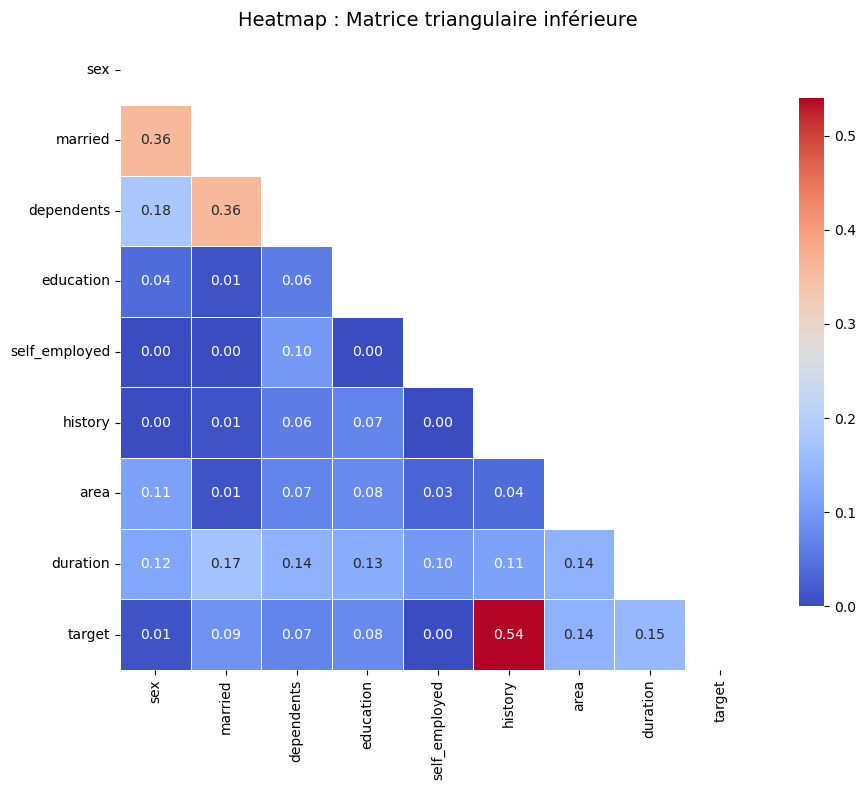

In [ ]:
# Création du masque de la partie supérieure
mask = np.triu(np.ones_like(df_assoc, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_assoc,
            mask=mask,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})

plt.title("Heatmap : Matrice triangulaire inférieure", fontsize=14)
plt.tight_layout()
plt.show()

- married et dependents → 0.36
- sex et married → 0.36
- target a des liens notables avec history (0.54), duration (0.15) et area (0.14)


### Croisement des variables numériques entre elles

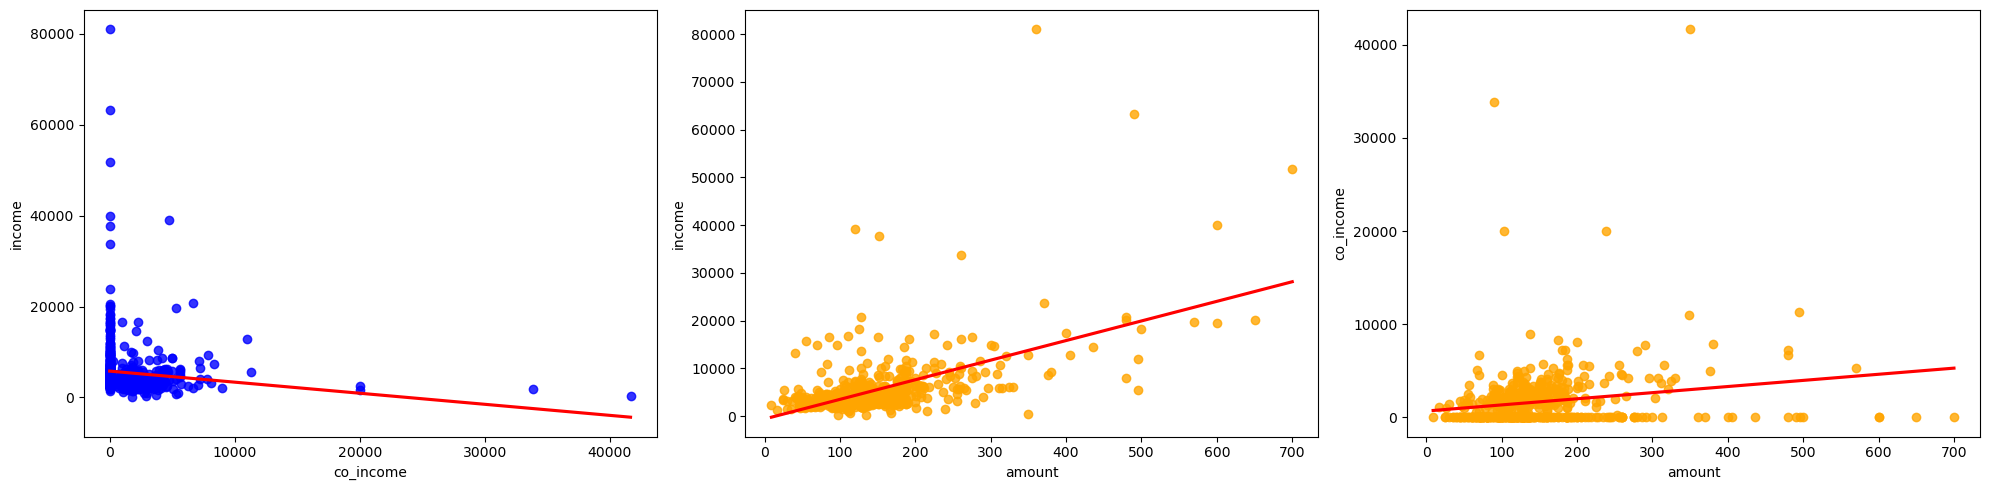

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
# income - coincome
sns.regplot(y = num_var["income"], x = num_var["co_income"], color = "blue", line_kws={"color": "red"}, ci = None, ax = axes[0])
# income - amount
sns.regplot(y = num_var["income"], x = num_var["amount"], color = "orange", line_kws={"color": "red"}, ci = None, ax = axes[1])
# co_income - amount
sns.regplot(y = num_var["co_income"], x = num_var["amount"], color = "orange", line_kws={"color": "red"}, ci = None, ax = axes[2])
plt.tight_layout()
plt.show()

In [ ]:
mat_corr = num_var.corr()

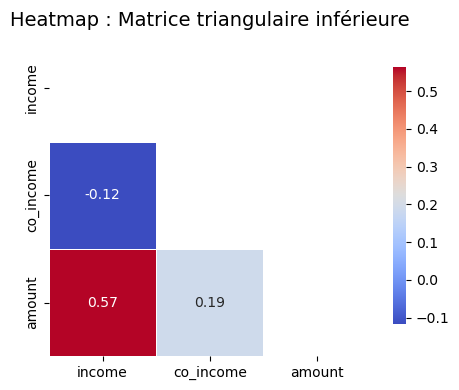

In [ ]:
# Création du masque de la partie supérieure
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(mat_corr,
            mask=mask,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})

plt.title("Heatmap : Matrice triangulaire inférieure", fontsize=14)
plt.tight_layout()
plt.show()

## Encodage des variables qualitatives :
- les variables ordinales seront encoder par des entiers partant de 0 (ou 1)
- la méthode **One-Hot-Encoding** servira à l'encodage des variables nominales

In [ ]:
# Les modalités des variables catégorielles
unique_values = pd.Series({var : [cat_var[var].unique()] for var in cat_var.columns})
unique_values

sex                                    [[Male, Female]]
married                                     [[No, Yes]]
dependents                              [[0, 1, 2, 3+]]
education                    [[Graduate, Not Graduate]]
self_employed                               [[No, Yes]]
history                                    [[1.0, 0.0]]
area                        [[Urban, Rural, Semiurban]]
duration         [[30, 10, 20, 15, 5, 25, 40, 3, 7, 1]]
target                                         [[Y, N]]
dtype: object

In [ ]:
# remplacement des chaines de caractères par des entiers (Y = 1 et Non = 0 ou Female = 0 et Male = 1 par ordre alphabétique)
cat_var["sex"] = cat_var["sex"].replace({"Female": 0, "Male" : 1}).astype("int")
cat_var["married"] = cat_var["married"].replace({"No": 0, "Yes" : 1}).astype("int")
cat_var["dependents"] = cat_var["dependents"].replace({"0": 0, "1" : 1, "2" : 2, "3+" : 3}).astype("int")
cat_var["education"] = cat_var["education"].replace({"Not Graduate": 0, "Graduate" : 1}).astype("int")
cat_var["self_employed"] = cat_var["self_employed"].replace({"No": 0, "Yes" : 1}).astype("int")
cat_var["history"] = cat_var["history"].replace({0.0: 0, 1.0 : 1}).astype("int")
cat_var["target"] = cat_var["target"].replace({"N": 0, "Y" : 1}).astype("int")

In [ ]:
unique_values = pd.Series({var : [cat_var[var].unique()] for var in cat_var.columns})
unique_values

sex                                            [[1, 0]]
married                                        [[0, 1]]
dependents                               [[0, 1, 2, 3]]
education                                      [[1, 0]]
self_employed                                  [[0, 1]]
history                                        [[1, 0]]
area                        [[Urban, Rural, Semiurban]]
duration         [[30, 10, 20, 15, 5, 25, 40, 3, 7, 1]]
target                                         [[1, 0]]
dtype: object

In [ ]:
# les types des variables
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sex            614 non-null    int32   
 1   married        614 non-null    int32   
 2   dependents     614 non-null    int32   
 3   education      614 non-null    int32   
 4   self_employed  614 non-null    int32   
 5   history        614 non-null    int32   
 6   area           614 non-null    object  
 7   duration       614 non-null    category
 8   target         614 non-null    int32   
dtypes: category(1), int32(7), object(1)
memory usage: 22.7+ KB


In [ ]:
# One-Hot-Encoding
cat_var = pd.get_dummies(cat_var, columns = ["area"], drop_first = True, dtype = int)

In [ ]:
cat_var

,sex,married,dependents,education,self_employed,history,duration,target,area_Semiurban,area_Urban
0,1,0,0,1,0,1,30,1,0,1
1,1,1,1,1,0,1,30,0,0,0
2,1,1,0,1,1,1,30,1,0,1
3,1,1,0,0,0,1,30,1,0,1
4,1,0,0,1,0,1,30,1,0,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,1,30,1,0,0
610,1,1,3,1,0,1,15,1,0,0
611,1,1,1,1,0,1,30,1,0,1
612,1,1,2,1,0,1,30,1,0,1


## Standardisation des variables numériques :
Le modèle KNN étant basé sur le calcul des distances, il est crucial de ramener les données à des échelles comparables, d' où la standardisation(aussi appelée **z-score scaling**).
- **Objectif** : centrer la variable autour de 0 et ajuster l’écart type à 1.
- **Formule** :   $z = \frac{x - \mu}{\sigma}$ où :
  - $x$  est la valeur d’origine
  - $\mu$ est la moyenne de la variable
  - $\sigma$ est son écart-type


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# instanciation de l'objet StandardScaler
scaler = StandardScaler()

In [ ]:
# standardisation des variables initiales (sans la tranformation logarithmique)
num_var = pd.DataFrame(scaler.fit_transform(num_var), columns = num_var.columns, index = num_var.index)

In [ ]:
num_var

,income,co_income,amount
0,0.072991,-0.554487,-0.211241
1,-0.134412,-0.038732,-0.211241
2,-0.393747,-0.554487,-0.948996
3,-0.462062,0.251980,-0.306435
4,0.097728,-0.554487,-0.056551
...,...,...,...
609,-0.410130,-0.554487,-0.889500
610,-0.212557,-0.554487,-1.258378
611,0.437174,-0.472404,1.276168
612,0.357064,-0.554487,0.490816


In [ ]:
# standardisation des variables transformées
num_var_transformed = pd.DataFrame(scaler.fit_transform(num_var_transformed), columns = num_var_transformed.columns, index = num_var_transformed.index)

In [ ]:
num_var_transformed

,income,co_income,amount
0,0.516186,-1.107783,-0.012803
1,0.137806,0.782158,-0.012803
2,-0.519479,-1.107783,-1.348663
3,-0.751605,0.897526,-0.143351
4,0.555727,-1.107783,0.182981
...,...,...,...
609,-0.572062,-1.107783,-1.201901
610,-0.032679,-1.107783,-2.350110
611,1.015921,0.308483,1.368737
612,0.918972,-1.107783,0.755185


## Concaténation des variables explcicatives (numériques et qualitatives) et de la cible en un seul data set

In [ ]:
# concaténation selon les colonnes (axis = 1) des variables initiales
data = pd.concat([num_var, cat_var], axis = 1)
data = data.copy()

In [ ]:
data.head(3)

,income,co_income,amount,sex,married,dependents,education,self_employed,history,duration,target,area_Semiurban,area_Urban
0,0.072991,-0.554487,-0.211241,1,0,0,1,0,1,30,1,0,1
1,-0.134412,-0.038732,-0.211241,1,1,1,1,0,1,30,0,0,0
2,-0.393747,-0.554487,-0.948996,1,1,0,1,1,1,30,1,0,1


In [ ]:
# concaténation  des variables transformées
data_transformed = pd.concat([num_var_transformed, cat_var], axis = 1)
data_transformed = data_transformed.copy()

In [ ]:
data_transformed.head(3)

,income,co_income,amount,sex,married,dependents,education,self_employed,history,duration,target,area_Semiurban,area_Urban
0,0.516186,-1.107783,-0.012803,1,0,0,1,0,1,30,1,0,1
1,0.137806,0.782158,-0.012803,1,1,1,1,0,1,30,0,0,0
2,-0.519479,-1.107783,-1.348663,1,1,0,1,1,1,30,1,0,1


In [ ]:
# sauvegarde des dataframe sous format "csv"
data.to_csv("initial_data.csv", index = False)
data_transformed.to_csv("transformed_data.csv", index = False)